<a href="https://colab.research.google.com/github/gormantt/foursquare-location-matching/blob/main/Ling_EDA_and_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis

---
Data analyzed in this notebook is from [Kaggle's code competation: Foursquare - Location Matching](https://www.kaggle.com/competitions/foursquare-location-matching/data). The data comprises over one-and-a-half million place entries for hundreds of thousands of commercial Points-of-Interest (POIs) around the globe. The task is to **determine which place entries describe the same point-of-interest**. Though the data entries may represent or resemble entries for real places, they may also contain artificial information or additional noise.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#For plotting
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Features analysis

---

The features available in `test.csv` include 

```
'name', 'latitude', 'longitude', 'address', 'city', 'state',
       'zip', 'country', 'url', 'phone', 'categories'
```


### latitude and longitude


---
We compute the difference for (latitude, longitude) of each pair in `pairs.csv`. It turns out 
  * locations with close (difference less than 0.001) can have have different POIs: stores are next to each other in a shopping center. In some extreme cases, places with identical coordinates can have different POI. For example, one classroom can be located vertically on top of another.  
  * conversely, locations physically far can represent the same POI, such as mountains.

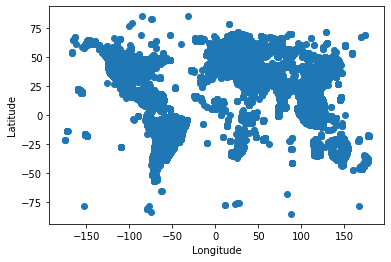

In [ ]:
plt.scatter(train.latitude.values, train.longitude.values)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
pairs.iloc[4]

id_1                              E_0000c362229d93
name_1                                  Coffee Cat
latitude_1                                7.082218
longitude_1                             125.610244
address_1                            F. Torres St.
city_1                                  Davao City
state_1                               Davao Region
zip_1                                         8000
country_1                                       PH
url_1                                          NaN
phone_1                                        NaN
categories_1                   Cafés, Coffee Shops
id_2                              E_d52c3c4d53831c
name_2                                   Coffeecat
latitude_2                                7.076016
longitude_2                             125.611457
address_2                     E. Jacinto Extension
city_2                                  Davao City
state_2                               Davao Region
zip_2                          

In [18]:
# Compute the difference of (latitude, longitude) of each pair in pairs.csv
pairs['location_diff'] = pd.concat([(pairs['latitude_1']-pairs['latitude_2']).abs(), (pairs['longitude_1']-pairs['longitude_2']).abs()], axis=1).max(axis=1)

pairs.location_diff.describe()

count    578907.000000
mean          0.131210
std           2.964284
min           0.000000
25%           0.000316
50%           0.001111
75%           0.004946
max         270.865670
Name: location_diff, dtype: float64

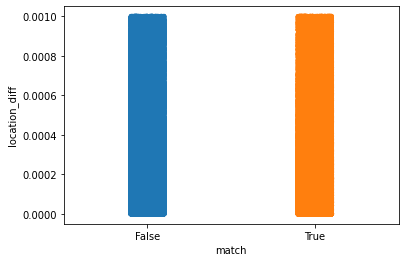

In [19]:
sns.stripplot(x="match", y="location_diff", data=pairs.loc[pairs.location_diff<0.001])
plt.show()

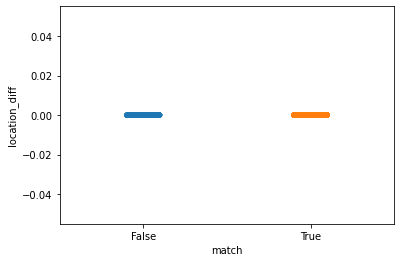

In [20]:
sns.stripplot(x="match", y="location_diff", data=pairs.loc[pairs.location_diff==0])
plt.show()

In [21]:
print('There are',len(pairs.loc[(pairs.location_diff==0) & (pairs.match==False)]),'pairs with location_diff=0 but different POIs, out of all',len(pairs),'pairs.')

There are 574 pairs with location_diff=0 but different POIs, out of all 578907 pairs.


### name

  * There are some true pairs with slightly different names, e.g. short name v.s. full name.
  * Conversely, there are false pairs with the same name, e.g. chain stores in different cities.

In [22]:
pairs.loc[pairs.match==True]

id_1                                name_1  latitude_1  \
0       E_000001272c6c5d                  Café Stad Oudenaarde   50.859975   
2       E_000023d8f4be44                            Island Spa   14.518970   
3       E_00007dcd2bb53f                     TOGO'S Sandwiches   38.257797   
5       E_0000c566a81ea1                              つじ田 味噌の章   35.694796   
6       E_0000d9e584ed9f         Signature Properties Savannah   32.012582   
...                  ...                                   ...         ...   
578899  E_ffff2b8abf31ab                        La Tagliatella   41.390307   
578901  E_ffff7b1a22e81b                              Sorrento   37.540007   
578902  E_ffff80f94b2fee              Blk 332 Hougang Avenue 5    1.368397   
578904  E_ffff989ae206f8  Cricket Wireless Authorized Retailer   36.130623   
578905  E_ffffca745329ed                                 焼肉 和家   35.710712   

        longitude_1                                    address_1      city_1  \
0          3.634196                                  Abdijstraat  Nederename   
2        121.018702  5th Flr, Newport Mall, Resorts World Manila  Pasay City   
3       -122.064599                     1380 Holiday Ln., Ste. B   Fairfield   
5        139.767348                                     神田小川町1-1        千代田区   
6        -81.113156                      100 Commercial Ct Ste C    Savannah   
...             ...                                          ...         ...   
578899     2.173657                           C. d’Ausiàs Marc 7   Barcelona   
578901   127.070265                                          NaN         NaN   
578902   103.898145                            332 Hougang Ave 5   Singapore   
578904   -86.715636                       825C Murfreesboro Pike   Nashville   
578905   139.775000                                     上野6-13-6       Taitō   

                state_1     zip_1 country_1  \
0       Oost-Vlaanderen      9700        BE   
2          Metro Manila       NaN        PH   
3                    CA     94534        US   
5                   東京都  101-0052        JP   
6                    GA     31406        US   
...                 ...       ...       ...   
578899        Barcelona     08008        ES   
578901              NaN       NaN        KR   
578902        Singapore    530332        SG   
578904               TN     37217        US   
578905              東京都  110-0005        JP   

                                                    url_1  ...  \
0                                                     NaN  ...   
2                                                     NaN  ...   
3       https://locations.togos.com/ll/US/CA/Fairfield...  ...   
5                            https://tsukemen-tsujita.com  ...   
6                   http://www.oursignatureproperties.com  ...   
...                                                   ...  ...   
578899                                                NaN  ...   
578901                                                NaN  ...   
578902                                                NaN  ...   
578904  https://www.cricketwireless.com/stores/ll/US/T...  ...   
578905                                                NaN  ...   

                     address_2     city_2    state_2  zip_2  country_2  \
0                          NaN        NaN        NaN    NaN         BE   
2                          NaN        NaN        NaN    NaN         PH   
3                          NaN  Fairfield         CA    NaN         US   
5                          NaN        NaN        NaN    NaN         JP   
6             7014 Abercorn St   Savannah         GA  31406         US   
...                        ...        ...        ...    ...        ...   
578899         Ausiàs March, 7  Barcelona  Barcelona  08010         ES   
578901                     NaN        NaN        NaN    NaN         KR   
578902           Hougang ave 5        NaN        NaN    NaN         SG   
578904  825C Murfreesbor

In [23]:
pairs.loc[pairs.match==True].values[0]

array(['E_000001272c6c5d', 'Café Stad Oudenaarde', 50.85997533509319,
       3.6341963487748346, 'Abdijstraat', 'Nederename', 'Oost-Vlaanderen',
       '9700', 'BE', nan, nan, 'Bars', 'E_da7fa3963561f8',
       'Café Oudenaarde', 50.869358, 3.635206, nan, nan, nan, nan, 'BE',
       nan, nan, 'Bars', True, 0.009382664906809168], dtype=object)

In [24]:
pairs.loc[(pairs.name_1==pairs.name_2)&(pairs.name_1=="McDonald's")&(pairs.match==True)]

id_1      name_1  latitude_1  longitude_1  \
673     E_0054712d9d9857  McDonald's   41.804347   -88.046846   
3080    E_016131fbea3143  McDonald's    4.397131   113.993632   
3429    E_018242e69010d0  McDonald's   41.651158   -88.124151   
3859    E_01b55e74db2bd0  McDonald's   40.496083   -80.246145   
4089    E_01cf1c6c123904  McDonald's   14.243853   121.059211   
...                  ...         ...         ...          ...   
572265  E_fd13ee41a7baab  McDonald's   51.588900    -3.210642   
574446  E_fe0f3aedff7524  McDonald's   43.687579   -79.286688   
575895  E_feab7256c7facf  McDonald's   45.961757   -66.643384   
576761  E_ff198dad8046e8  McDonald's   31.505339   -87.318019   
578639  E_ffddbeb88558da  McDonald's   -6.123487   106.833093   

                       address_1              city_1      state_1     zip_1  \
673               2535 Ogden Ave       Downers Grove           IL     60515   
3080            Bintang Megamall                Miri      Sarawak     98000   
3429              675 N Weber Rd          Romeoville           IL     60446   
3859            Airside Terminal          Pittsburgh           PA     15231   
4089      Sta Rosa - Tagaytay Rd  City of Santa Rosa       Laguna      4026   
...                          ...                 ...          ...       ...   
572265            CROSSWAYS PARK          Caerphilly          NaN  CF83 3NL   
574446  2480 Gerrard Street East         Scarborough           ON   M1N 4C3   
575895              King's Place         Fredericton           NB       NaN   
576761        1511 S Alabama Ave         Monroeville           AL     36460   
578639   Jalan Lodan Timur No. 7       Jakarta Utara  DKI Jakarta     14430   

       country_1                                              url_1  ...  \
673           US  https://www.mcdonalds.com/us/en-us/location/il...  ...   
3080          MY                        http://www.mcdonalds.com.my  ...   
3429          US  https://www.mcdonalds.com/us/en-us/location/il...  ...   
3859          US  https://www.mcdonalds.com/us/en-us/location/pa...  ...   
4089          PH                                                NaN  ...   
...          ...                                                ...  ...   
572265        GB                         http://www.mcdonalds.co.uk  ...   
574446        CA  https://www.mcdonalds.com/ca/en-ca/restaurant-...  ...   
575895        CA                            http://www.mcdonalds.ca  ...   
576761        US  https://www.mcdonalds.com/us/en-us/location/al...  ...   
578639        ID                           http://www.mcdonalds.com  ...   

                      address_2         city_2                    state_2  \
673              2535 Ogden Ave  Downers Grove                         IL   
3080                  1st Floor           Miri                    Sarawak   
3429             675 N Weber Rd     Romeoville                         IL   
3859                 Terminal A     Coraopolis                         PA   
4089                        NaN            NaN                        NaN   
...                         ...            ...                        ...   
572265             Crossways Pk     Caerphilly  Caerphilly County Borough   
574446                      NaN        Toronto                         ON   
575895          440 King Street    Fredericton                         NB   
576761       1511 S Alabama Ave    Monroeville                         AL   
578639  Jalan Lodan Timur No. 7  Jakarta Utara                    Jakarta   

           zip_2  country_2  \
673        60515         US   
3080         NaN         MY   
3429       60446         US   
3859       15108         US   
4089         NaN         PH   
...          ...        ...   
572265  CF83 3NL         GB   
574446       NaN         CA   
575895   E3B 5H8         CA   
576761     36460         US   
578639     14430         ID   

                                                    url_2        phone_2  \
673

In [25]:
pairs.loc[(pairs.name_1==pairs.name_2)&(pairs.name_1=="McDonald's")&(pairs.match==True)].values[0]

array(['E_0054712d9d9857', "McDonald's", 41.80434733686549,
       -88.04684628582879, '2535 Ogden Ave', 'Downers Grove', 'IL',
       '60515', 'US',
       'https://www.mcdonalds.com/us/en-us/location/il/downers-grove/2535-ogden-ave/36793.html',
       '+16309647433', 'Fast Food Restaurants', 'E_3d2134a9e1c29a',
       "McDonald's", 41.802858161557765, -88.14267043789413,
       '2535 Ogden Ave', 'Downers Grove', 'IL', '60515', 'US', nan, nan,
       'American Restaurants', True, 0.09582415206533312], dtype=object)

### address

#### street address

#### city

#### state

#### zip

#### country

### url


### phone

### categories

## Comparing string features

Most columns in this data are strings. We consider different metrics for string comparison, including:


*   SequenceMatcher
*   Levenshtein distance

If one value of a pair of features is missing, we set the distance to be -1.



In [26]:
from difflib import SequenceMatcher
import math
# Reference: https://stackoverflow.com/questions/43916271/python-pandas-sequencematch-columns-for-each-value-and-return-closet-match

def seq_metric(df, col1, col2):
    a = df[col1]
    b = df[col2]
    
    if type(a)!=str or type(b)!=str:
        return -1
    else:
        a = a.lower().replace(" ", "").replace("'", "")
        b = b.lower().replace(" ", "").replace("'", "")
        
    return 1-SequenceMatcher(None, a, b).ratio()

In [27]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from Levenshtein import distance as lev
def lev_metric(df, col1, col2):
    a = df[col1]
    b = df[col2]
    
    if type(a)!=str or type(b)!=str:
        return -1
    else:
        a = a.lower().replace(" ", "").replace("'", "")
        b = b.lower().replace(" ", "").replace("'", "")
    #if a in b or b in a: 
    #    return 0
    return lev(a,b)/max(len(a),len(b))

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

coun_vect=CountVectorizer()

def countvec_metric(df, col1, col2):
    a = df[col1]
    b = df[col2]
    if type(a)!=str or type(b)!=str:
        return -1
    else:
        count_matrix=coun_vect.fit_transform([a,b])
    return np.count_nonzero(count_matrix.toarray()[0]!=count_matrix.toarray()[1])/len(count_matrix.toarray()[0])

The following function allows us to apply different metric on the columns of pairs.csv to generate distance between features.

In [30]:
def compute_diffs(df, cols, string_metric):
    df_copy = df
    for col in cols:
        df_copy[col+'_diff'] = df.apply(string_metric,
                          args=(col+'_1', col+'_2'),
                          axis=1)
    return df_copy[ ['id_1','id_2','match']+['location_diff']+ [col+'_diff' for col in cols] ]

In [31]:
# Using SequenceMatcher

columns = ['name', 'address', 'city', 'state',
       'zip', 'url', 'phone', 'categories']
       
pairs_seq = compute_diffs(pairs, columns, seq_metric)

In [32]:
# Using Levenshtein distance

columns = ['name', 'address', 'city', 'state',
       'zip', 'url', 'phone', 'categories']
       
pairs_lev = compute_diffs(pairs, columns, lev_metric)

### Histogram of matches vs features

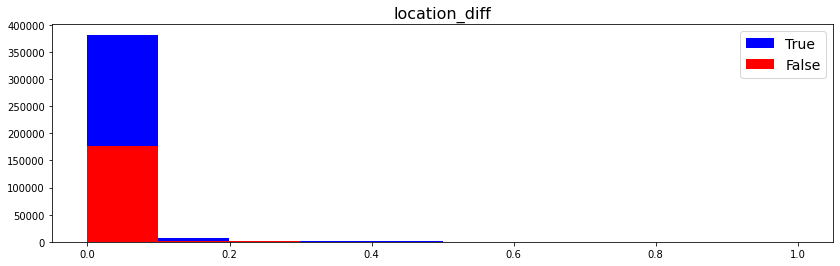

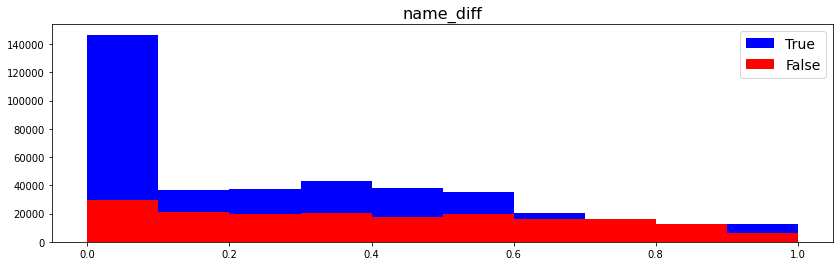

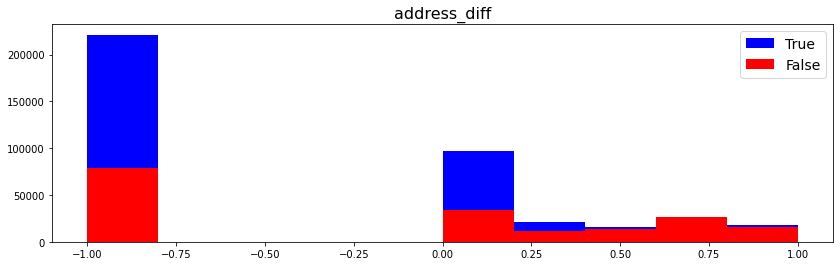

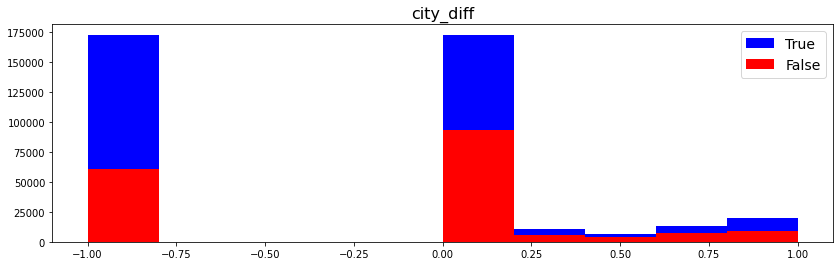

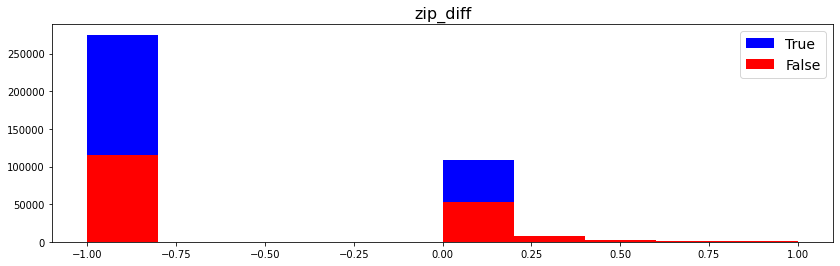

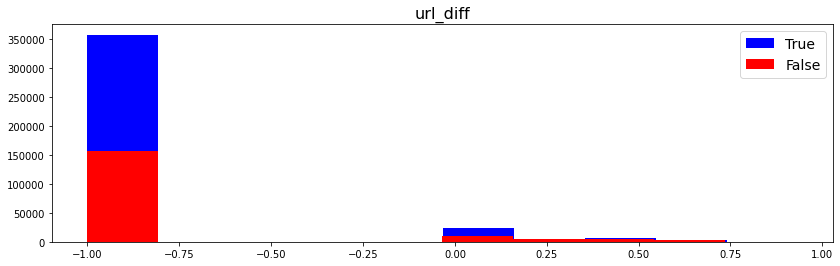

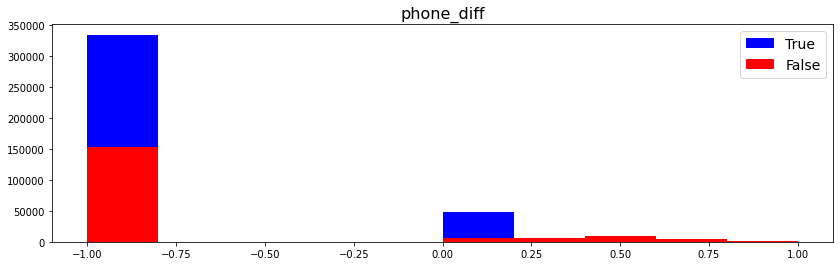

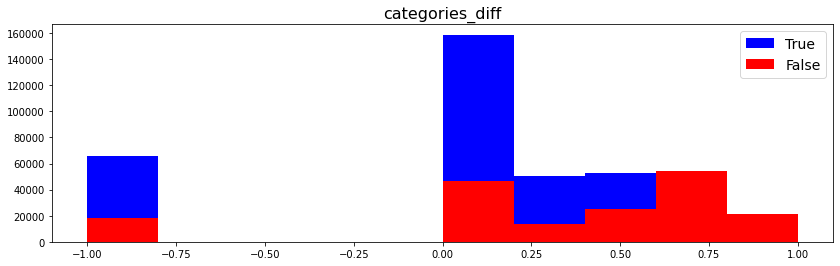

In [33]:
## histograms for SequenceMatcher

for column in ['location_diff','name_diff','address_diff','city_diff','zip_diff','url_diff', 'phone_diff', 'categories_diff']:
    plt.figure(figsize=(14,4))
    plt.hist(pairs_seq.loc[(pairs_seq.match==True)&(pairs_seq.location_diff<1), column], color='b', label="True")
    plt.hist(pairs_seq.loc[(pairs_seq.match==False)&(pairs_seq.location_diff<1), column], color='r', label="False")
    plt.legend(fontsize=14)
    plt.title(column,fontsize=16)
    plt.show()

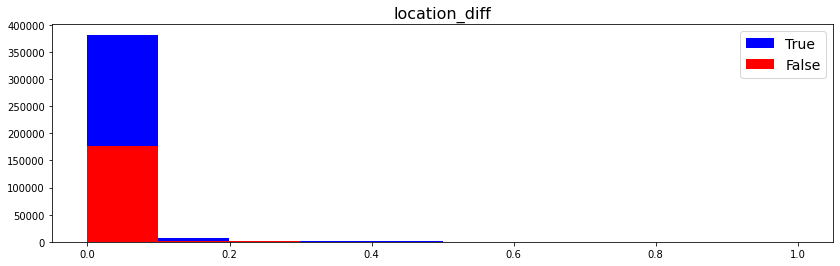

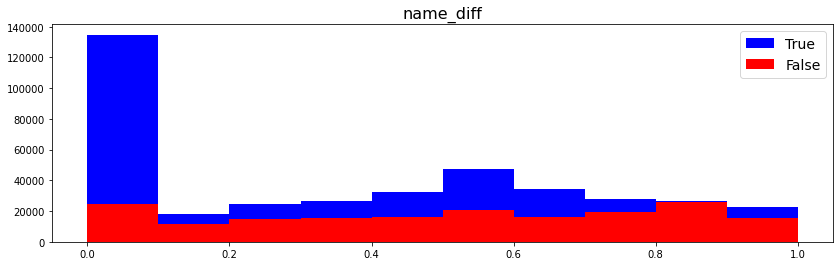

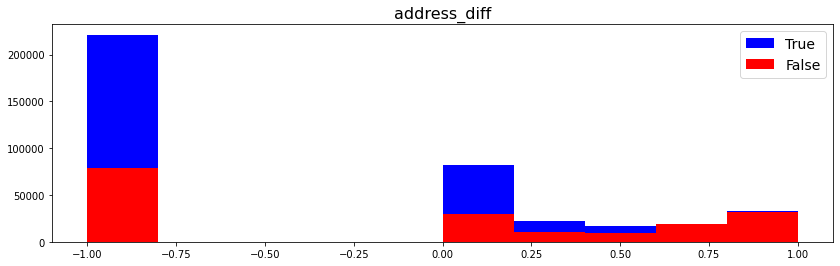

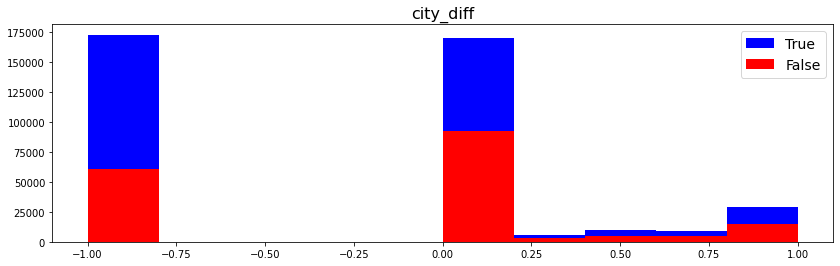

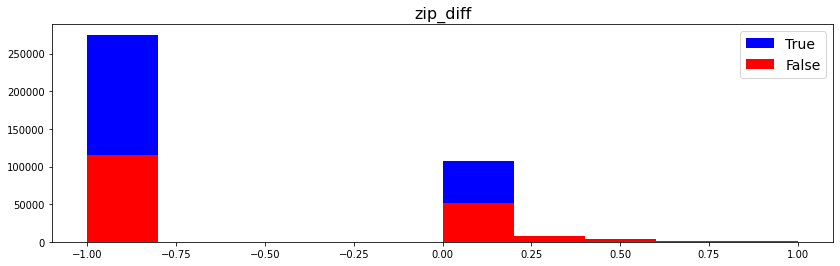

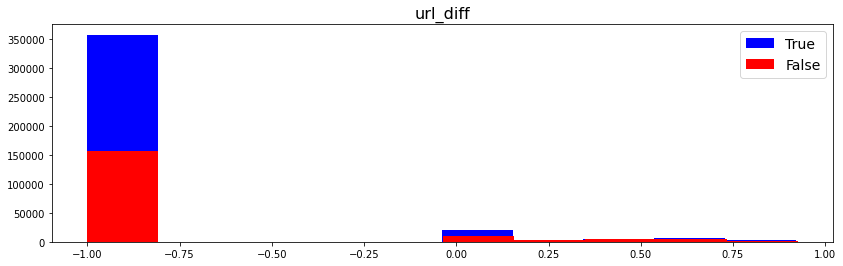

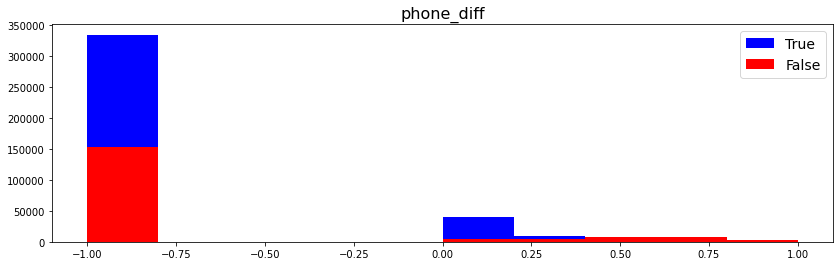

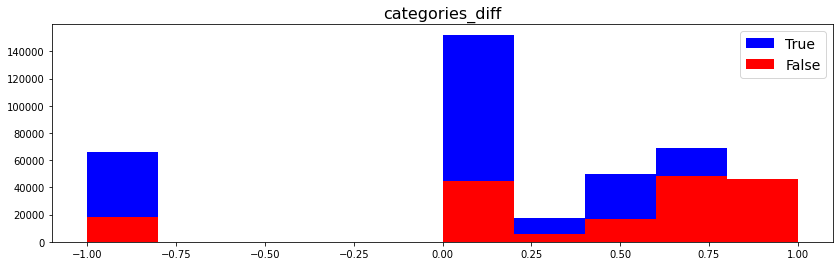

In [34]:
# Histogram for Levenshtein distance
for column in ['location_diff','name_diff','address_diff','city_diff','zip_diff','url_diff', 'phone_diff', 'categories_diff']:
    plt.figure(figsize=(14,4))
    plt.hist(pairs_lev.loc[(pairs_lev.match==True)&(pairs_lev.location_diff<1), column], color='b', label="True")
    plt.hist(pairs_lev.loc[(pairs_lev.match==False)&(pairs_lev.location_diff<1), column], color='r', label="False")
    plt.legend(fontsize=14)
    plt.title(column,fontsize=16)
    plt.show()

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

lreg = LogisticRegression()

We read the data below.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pairs = pd.read_csv('/content/drive/MyDrive/Summer 2022/foursquare-location-matching/pairs.csv')
test = pd.read_csv('/content/drive/MyDrive/Summer 2022/foursquare-location-matching/test.csv')
train = pd.read_csv('/content/drive/MyDrive/Summer 2022/foursquare-location-matching/train.csv')

## Training data




### The data


*   `train.csv` - The training set, comprising eleven attribute fields for over one million place entries, together with:
  * `id` - A unique identifier for each entry.
  * `point_of_interest` - An identifier for the POI the entry represents. There may be one or many entries describing the same POI. Two entries "match" when they describe a common POI. 
*   `pairs.csv` - A pregenerated set of pairs of place entries from `train.csv` designed to improve detection of matches.
  * `match` - Whether (`True` or `False`) the pair of entries describes a common POI.

In [5]:
train.sample(5)

id                       name   latitude   longitude  \
754762  E_a98ba9774411c6     Warunk Upnormal Cinere  -6.329500  106.784197   
284221  E_3fcf9d786f5900      Laboratório Dom Bosco  -1.448725  -48.492586   
592628  E_853319fa3d7a9a     宣南书馆 Xuan Nan Shu Guan  39.871804  116.374955   
799205  E_b37dd47628f733               Fitness Park  20.050953   99.891000   
458669  E_67114b18642165  hotel laut biru kamar 309  -7.700831  108.656546   

                         address               city       state    zip  \
754762                       NaN                NaN         NaN    NaN   
284221                       NaN                NaN         NaN    NaN   
592628         T80 Caishikou Ave            Beijing     Beijing    NaN   
799205  Mae Fah Luang University  Mueang Chiang Rai  Chiang Rai  57100   
458669                       NaN        Pangandaran   West Java    NaN   

       country  url phone        categories point_of_interest  
754762      ID  NaN   NaN               NaN  P_2a069af8695d1b  
284221      BR  NaN   NaN      College Labs  P_024960942e855f  
592628      CN  NaN   NaN      Comedy Clubs  P_1ea618e1be6da3  
799205      TH  NaN   NaN      College Gyms  P_fea5e8a9cdb9a9  
458669      ID  NaN   NaN  Bed & Breakfasts  P_5fef20e7d813e4

We take a look at of how many POIs are in the data, compared to the total number of rows.

In [6]:
print('There are', len(set(train.id)), 'id, and', len(set(train.point_of_interest)), 'distinct POIs.\n')
print('About', np.round(len(set(train.point_of_interest))/len(set(train.id))*100,2),'% POIs are unique.\n')

There are 1138812 id, and 739972 distinct POIs.

About 64.98 % POIs are unique.



We take a look at the features that are available to analyze and examine the ratio of missing values in the columns.

In [7]:
train.columns

Index(['id', 'name', 'latitude', 'longitude', 'address', 'city', 'state',
       'zip', 'country', 'url', 'phone', 'categories', 'point_of_interest'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138812 entries, 0 to 1138811
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1138812 non-null  object 
 1   name               1138811 non-null  object 
 2   latitude           1138812 non-null  float64
 3   longitude          1138812 non-null  float64
 4   address            742191 non-null   object 
 5   city               839623 non-null   object 
 6   state              718226 non-null   object 
 7   zip                543386 non-null   object 
 8   country            1138801 non-null  object 
 9   url                267724 non-null   object 
 10  phone              342855 non-null   object 
 11  categories         1040505 non-null  object 
 12  point_of_interest  1138812 non-null  object 
dtypes: float64(2), object(11)
memory usage: 112.9+ MB


In [9]:
pairs.sample(5)

id_1                                    name_1  \
457962  E_ca09066a5ddc1c                                   Studio7   
20393   E_08fa22c68806d0                                 Taco Bell   
459151  E_ca89419116da6a                                       STK   
369326  E_a32d3a15dc85ba                    Pop Century Playground   
143710  E_3f39f2fdd11a2f  Baptist Neighborhood Hospital - Overlook   

        latitude_1  longitude_1             address_1            city_1  \
457962   13.777920   100.476390  CentralPlaza Pinklao       Bangkok Noi   
20393    41.742370   -72.711520      485 Flatbush Ave          Hartford   
459151   48.955977    21.259583                   NaN            Prešov   
369326   28.349066   -81.543072    Pop Century Resort  Lake Buena Vista   
143710   29.680739   -98.454758          25615 US-281       San Antonio   

        state_1  zip_1 country_1                       url_1  ... longitude_2  \
457962  Bangkok  10700        TH  http://www.maccomseven.com  ...  100.476500   
20393        CT  06106        US     http://www.tacobell.com  ...  -72.711832   
459151      NaN    NaN        SK                         NaN  ...   21.258461   
369326       FL  32830        US                         NaN  ...  -81.542558   
143710       TX  78261        US                         NaN  ...  -98.455190   

                     address_2            city_2         state_2   zip_2  \
457962         Central Pinklao       Arun Amarin         Bangkok     NaN   
20393         485 Flatbush Ave          Hartford              CT   06106   
459151      Petrovianska 500/1            Prešov  Prešovský kraj  080 05   
369326         1050 Century Dr  Lake Buena Vista              FL   32830   
143710  25615 US Highway 281 N       San Antonio              TX   78258   

        country_2                                     url_2       phone_2  \
457962         TH                                       NaN           NaN   
20393          US                 https://www.ljsilvers.com  +18609531654   
459151         SK                                       NaN           NaN   
369326         US                                       NaN    4079384000   
143710         US  https://www.baptistemergencyhospital.com  +12105722911   

                                      categories_2  match  
457962                          Electronics Stores   True  
20393   Fast Food Restaurants, Seafood Restaurants  False  
459151                              Auto Workshops   True  
369326                                   Bus Stops  False  
143710                   Hospitals, Hospital Wards   True  

[5 rows x 25 columns]

In [10]:
print('There are', len(pairs), 'pairs,', len(set(pairs.id_1)), 'id_1s and', len(set(pairs.id_2)), 'id_2s.\n')

There are 578907 pairs, 464765 id_1s and 565512 id_2s.



# Modeling

## Threshoding location_diff

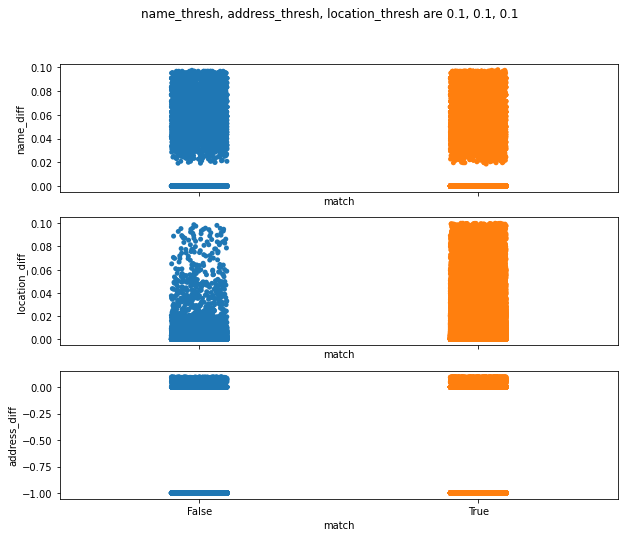

(True     0.911419
 False    0.088581
 Name: match, dtype: float64, 0.17724263137256935)

In [35]:
name_thresh, address_thresh, location_thresh = 0.1,0.1,0.1
cols = ['name_diff','location_diff', 'address_diff']

df = pairs_lev.loc[(pairs_lev.name_diff<name_thresh)&(pairs_lev.address_diff<address_thresh)&(pairs_lev.location_diff<location_thresh)]

fig,ax = plt.subplots(3,1, figsize=(10,8), sharex=True)

fig.suptitle('name_thresh, address_thresh, location_thresh are 0.1, 0.1, 0.1')

for i in range(len(cols)):
    sns.stripplot(x="match", y=cols[i], data=df, ax=ax[i])

plt.show()

df.match.value_counts()/len(df), len(df)/len(pairs_lev)

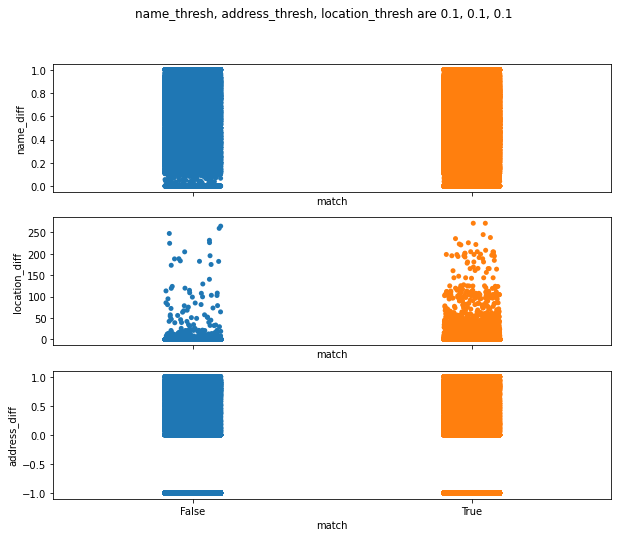

(True     0.63367
 False    0.36633
 Name: match, dtype: float64, 0.7299117129348929)

In [86]:
thresh = .1
cols = ['name_diff','location_diff', 'address_diff']

df = pairs_lev.loc[(pairs_lev.name_diff>thresh)|(pairs_lev.location_diff>thresh)]

fig,ax = plt.subplots(3,1, figsize=(10,8), sharex=True)

fig.suptitle('name_thresh, address_thresh, location_thresh are 0.1, 0.1, 0.1')

for i in range(len(cols)):
    sns.stripplot(x="match", y=cols[i], data=df, ax=ax[i])

plt.show()

df.match.value_counts()/len(df),  len(df)/len(pairs_lev)

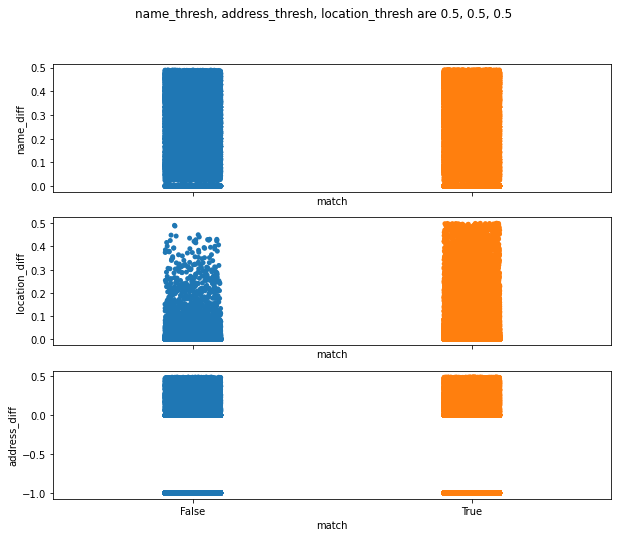

True     0.776838
False    0.223162
Name: match, dtype: float64

In [39]:
name_thresh, address_thresh, location_thresh = 0.5, 0.5, 0.5
cols = ['name_diff','location_diff', 'address_diff']

df = pairs_lev.loc[(pairs_lev.name_diff<name_thresh)&(pairs_lev.address_diff<address_thresh)&(pairs_lev.location_diff<location_thresh)]

fig,ax = plt.subplots(3,1, figsize=(10,8), sharex=True)

fig.suptitle('name_thresh, address_thresh, location_thresh are 0.5, 0.5, 0.5')

for i in range(len(cols)):
    sns.stripplot(x="match", y=cols[i], data=df, ax=ax[i])

plt.show()

df.match.value_counts()/len(df)

In [40]:
pairs.loc[pairs.id_1=='E_00efc97ecd2a98'].values

array([['E_00efc97ecd2a98', 'Greek From Greece', 40.75195022641434,
        -73.99019108026202, nan, 'New York', 'NY', '10018', 'US', nan,
        nan, 'Greek Restaurants', 'E_b213a99b54954a',
        'Greek From Greece', 40.759575, -73.989365, '45 W 45th St',
        'New York', 'NY', '10036', 'US', nan, nan, 'Cafés', False,
        0.00762477358566116, 0.0, -1.0, 0.0, 0.0, 0.4, -1.0, -1.0, 0.875]],
      dtype=object)

## Baseline

In [71]:
import random

def baseline(df, cols, thresh):
    df_copy = df.copy()
    df_copy['match'] = np.random.choice([True, False], len(df))
    df_copy.loc[df_copy[cols].max(axis=1)<thresh] = True
    
    return df_copy

In [88]:
# Using SequenceMatcher
cols = ['location_diff','name_diff','address_diff']
y_test = pairs_seq['match']
y_pred = baseline(pairs_seq, cols, 0.1).match
print(confusion_matrix(y_test,y_pred),'\n', roc_auc_score(y_test,y_pred))

[[ 83753  96368]
 [146460 252326]] 
 0.5488586125444874


In [73]:
# Using Levenshtein distance
cols = ['location_diff','name_diff','address_diff']
y_test = pairs_lev['match']
y_pred = baseline(pairs_seq, cols, 0.1).match
print(confusion_matrix(y_test,y_pred),'\n', roc_auc_score(y_test,y_pred))

[[ 83834  96287]
 [146710 252076]] 
 0.5487700100713221


## Logistric regression

### Using SequenceMatcher

In [ ]:
cols = ['location_diff','name_diff','address_diff','city_diff','zip_diff','url_diff', 'phone_diff', 'categories_diff']

columns = [ cols[1:i+2] for i in range(len(cols)-1)]

scores=[]

for cols in columns:
    pairs_copy=pairs_seq[['match']+cols]

    train,test=train_test_split(pairs_copy, test_size=.2, random_state=0)

    X_train = train[cols]
    X_test = test[cols]

    y_train = train['match']
    y_test = test['match']

    lreg = LogisticRegression()
    lreg.fit(X_train,y_train)

    y_pred = lreg.predict(X_test)

    confusion_matrix(y_test,y_pred)
    scores.append(roc_auc_score(y_test,y_pred))

print(scores)

[0.5086643245744975, 0.5702194978810758, 0.5692732510218169, 0.5717358411310232, 0.571723497620161, 0.5705825343142642, 0.5933675913331048]


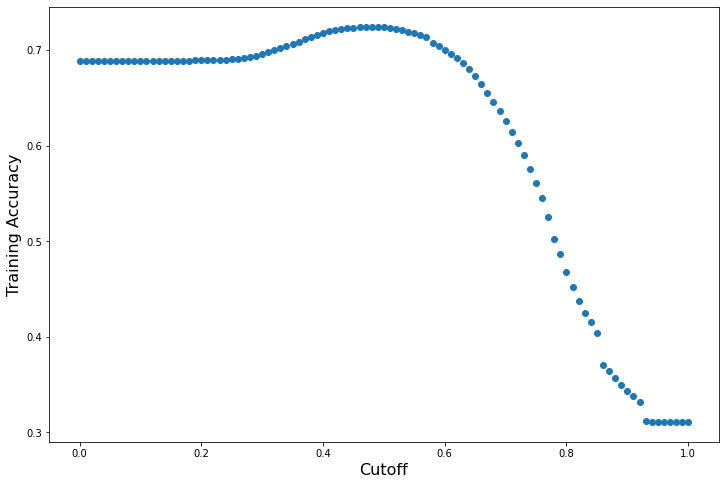

In [ ]:
## set the cutoff
cutoff = 0.8

cols = ['location_diff','name_diff','address_diff','city_diff','zip_diff','url_diff', 'phone_diff', 'categories_diff']

pairs_copy=pairs_seq[['match']+cols]
train, test=train_test_split(pairs_copy, test_size=.2, random_state=0)

X_train = train[cols]
X_test = test[cols]
y_train = train['match']
y_test = test['match']

lreg = LogisticRegression(C=1)
lreg.fit(X_train,y_train)

## store the predicted probabilities
y_prob = lreg.predict_proba(X_train)[:,1]

#y_pred = lreg.predict(X_test)
#confusion_matrix(y_test,y_pred)
#scores.append(roc_auc_score(y_test,y_pred))

## Now plot how the accuracy changes with the cutoff
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob >= cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)

plt.show()

In [ ]:
print('The percentage of true matches is',"{:.2%}".format(pairs.match.value_counts()[1]/len(pairs)))

The percentage of true matches is 68.89%


### Using Levenshtein distance

In [ ]:
cols = ['location_diff','name_diff','address_diff','city_diff','zip_diff','url_diff', 'phone_diff', 'categories_diff']

columns = [ cols[:i+2] for i in range(len(cols)-1)]

scores=[]
for cols in columns:
    pairs_copy=pairs_lev[['match']+cols]

    train, test=train_test_split(pairs_copy, test_size=.2, random_state=0)

    X_train = train[cols]
    X_test = test[cols]

    y_train = train['match']
    y_test = test['match']

    lreg = LogisticRegression(C=1)
    lreg.fit(X_train,y_train)

    y_pred = lreg.predict(X_test)

    confusion_matrix(y_test,y_pred)
    scores.append(roc_auc_score(y_test,y_pred))

print(scores)

[0.5, 0.5647949494797362, 0.5654369340355991, 0.5696772493308961, 0.5700608527213438, 0.5688630421182831, 0.5890845677091827]


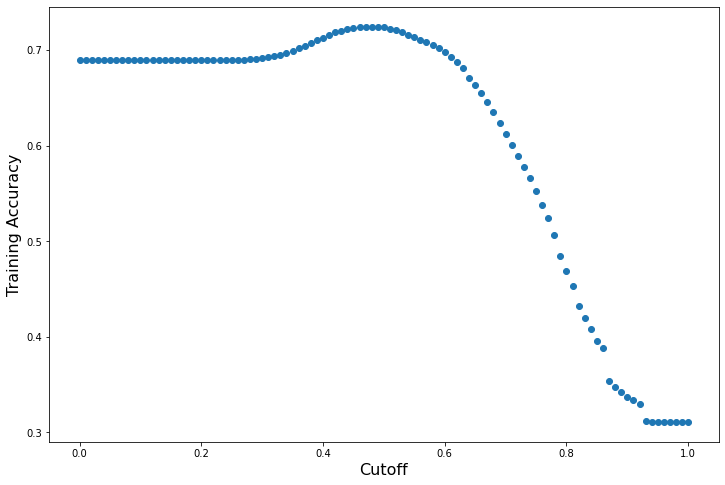

0.7243638326585695

In [ ]:
## set the cutoff
cutoff = 0.8

cols = ['location_diff','name_diff','address_diff','city_diff','zip_diff','url_diff', 'phone_diff', 'categories_diff']

pairs_copy=pairs_lev[['match']+cols]
train, test=train_test_split(pairs_copy, test_size=.2, random_state=0)

X_train = train[cols]
X_test = test[cols]
y_train = train['match']
y_test = test['match']

lreg = LogisticRegression(C=1)
lreg.fit(X_train,y_train)

## store the predicted probabilities
y_prob = lreg.predict_proba(X_train)[:,1]

#y_pred = lreg.predict(X_test)
#confusion_matrix(y_test,y_pred)
#scores.append(roc_auc_score(y_test,y_pred))

## Now plot how the accuracy changes with the cutoff
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob >= cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))
plt.scatter(cutoffs,accs)
plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)

plt.show()

max(accs)

# Considering US data only

We counts the number of different countries and see that half of the data in both `train.csv` and pairs.csv are from the US.

In [89]:
pairs.country_1.value_counts()

US    117793
ID     68412
TR     61497
JP     34217
TH     31591
       ...  
YT         1
PW         1
DJ         1
SH         1
EH         1
Name: country_1, Length: 213, dtype: int64

In [90]:
train.country.value_counts()

US    245284
TR    115177
ID    110796
JP     70032
TH     58808
       ...  
BV         1
GY         1
PM         1
SS         1
VU         1
Name: country, Length: 221, dtype: int64

In [91]:
train_US = train.loc[train.country=='US']
train_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245284 entries, 8 to 1138808
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 245284 non-null  object 
 1   name               245283 non-null  object 
 2   latitude           245284 non-null  float64
 3   longitude          245284 non-null  float64
 4   address            188824 non-null  object 
 5   city               236241 non-null  object 
 6   state              239373 non-null  object 
 7   zip                213277 non-null  object 
 8   country            245284 non-null  object 
 9   url                99477 non-null   object 
 10  phone              131597 non-null  object 
 11  categories         232133 non-null  object 
 12  point_of_interest  245284 non-null  object 
dtypes: float64(2), object(11)
memory usage: 26.2+ MB


In [92]:
for col in train.columns:
    print('In train.csv,',"{:.6%}".format(1-len(train[col].dropna())/len(train[col])), 'rows have "NaN" for', col)

In train.csv, 0.000000% rows have "NaN" for id
In train.csv, 0.000088% rows have "NaN" for name
In train.csv, 0.000000% rows have "NaN" for latitude
In train.csv, 0.000000% rows have "NaN" for longitude
In train.csv, 34.827610% rows have "NaN" for address
In train.csv, 26.272027% rows have "NaN" for city
In train.csv, 36.931996% rows have "NaN" for state
In train.csv, 52.284837% rows have "NaN" for zip
In train.csv, 0.000966% rows have "NaN" for country
In train.csv, 76.490940% rows have "NaN" for url
In train.csv, 69.893626% rows have "NaN" for phone
In train.csv, 8.632417% rows have "NaN" for categories
In train.csv, 0.000000% rows have "NaN" for point_of_interest


In [93]:
for col in train_US.columns:
    print('In train_US.csv,',"{:.6%}".format(1-len(train_US[col].dropna())/len(train_US[col])), 'rows have "NaN" for', col)

In train_US.csv, 0.000000% rows have "NaN" for id
In train_US.csv, 0.000408% rows have "NaN" for name
In train_US.csv, 0.000000% rows have "NaN" for latitude
In train_US.csv, 0.000000% rows have "NaN" for longitude
In train_US.csv, 23.018216% rows have "NaN" for address
In train_US.csv, 3.686747% rows have "NaN" for city
In train_US.csv, 2.409860% rows have "NaN" for state
In train_US.csv, 13.048955% rows have "NaN" for zip
In train_US.csv, 0.000000% rows have "NaN" for country
In train_US.csv, 59.444155% rows have "NaN" for url
In train_US.csv, 46.349130% rows have "NaN" for phone
In train_US.csv, 5.361540% rows have "NaN" for categories
In train_US.csv, 0.000000% rows have "NaN" for point_of_interest


For this short project, there are several reasons to restrict to just the US locations (polish this):


1.   There are notably less missing values in the US locations, compared to the whole set of data.
2.   Data in most of the columns are strings and can be of different languages (**add Tim's figure**).
3.   It reduce the size of the dataset, so that it is more managable to analyze in such a short time.   



In [94]:
train_US = train.loc[train.country=='US']
pairs_US = pairs.loc[(pairs.country_1=='US') & (pairs.country_2=='US')]

In [95]:
print("{:.2%}".format(len(train_US)/len(train)),'locations are in US')
print("{:.2%}".format(len(pairs_US)/len(pairs)),'pairs are in US')

21.54% locations are in US
20.33% pairs are in US


## Generate difference columns

In [97]:
columns = ['name', 'address', 'city', 'state',
       'zip', 'url', 'phone', 'categories']
       
pairs_US_seq = compute_diffs(pairs_US, columns, seq_metric)
pairs_US_lev = compute_diffs(pairs_US, columns, lev_metric)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Modeling

In [106]:
cols = ['location_diff','name_diff','address_diff']
y_test = pairs_US_seq['match']
y_pred = baseline(pairs_US_seq, cols, 0.1).match
print(confusion_matrix(y_test,y_pred),'\n', roc_auc_score(y_test,y_pred),'\n',np.sum(y_test == y_pred)/len(y_pred))

[[15483 17614]
 [26133 58478]] 
 0.579473099904899 
 0.6283430183165121


In [107]:
cols = ['location_diff','name_diff','address_diff']
y_test = pairs_US_lev['match']
y_pred = baseline(pairs_US_lev, cols, 0.1).match
print(confusion_matrix(y_test,y_pred),'\n', roc_auc_score(y_test,y_pred),'\n',np.sum(y_test == y_pred)/len(y_pred))

[[15901 17196]
 [27909 56702]] 
 0.5752927823454854 
 0.6168059944948516


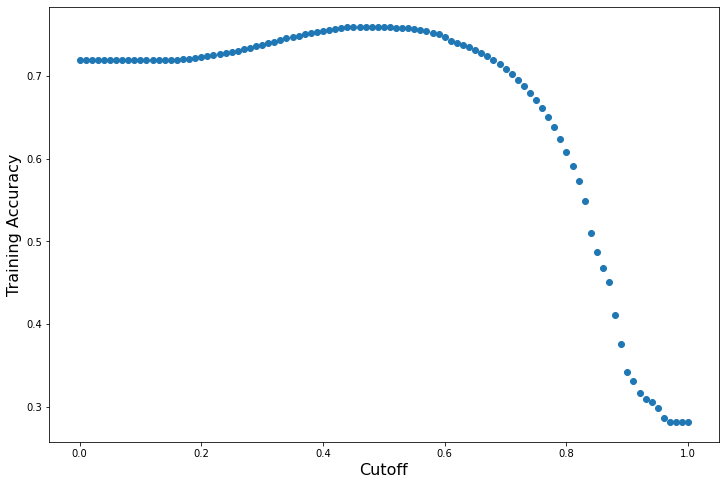

0.7593292695877493

In [108]:
## set the cutoff
cols = ['location_diff','name_diff','address_diff','city_diff','zip_diff','url_diff', 'phone_diff', 'categories_diff']

pairs_copy=pairs_US_seq[['match']+cols]
train, test=train_test_split(pairs_copy, test_size=.2, random_state=0)

X_train = train[cols]
X_test = test[cols]
y_train = train['match']
y_test = test['match']

lreg = LogisticRegression(C=1)
lreg.fit(X_train,y_train)

## store the predicted probabilities
y_prob = lreg.predict_proba(X_train)[:,1]

#y_pred = lreg.predict(X_test)
#confusion_matrix(y_test,y_pred)
#scores.append(roc_auc_score(y_test,y_pred))

## Now plot how the accuracy changes with the cutoff
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob >= cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)

plt.show()

max(accs)

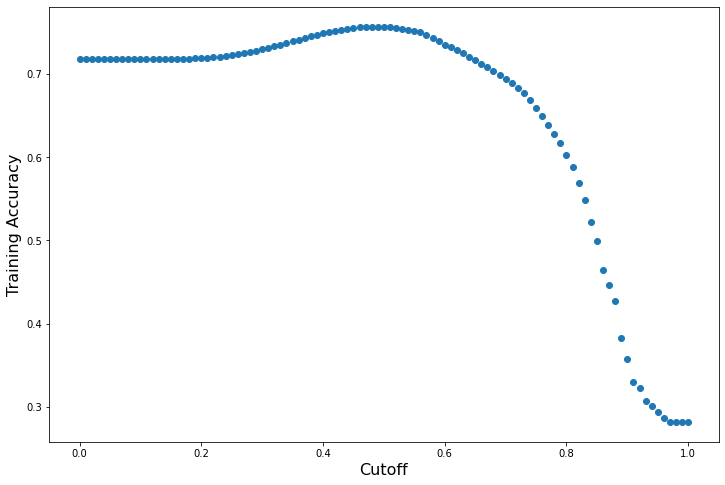

0.7570779262154068

In [105]:
## set the cutoff
cutoff = 0.8

cols = ['location_diff','name_diff','address_diff','city_diff','zip_diff','url_diff', 'phone_diff', 'categories_diff']

pairs_copy=pairs_US_lev[['match']+cols]
train, test=train_test_split(pairs_copy, test_size=.2, random_state=0)

X_train = train[cols]
X_test = test[cols]
y_train = train['match']
y_test = test['match']

lreg = LogisticRegression(C=1)
lreg.fit(X_train,y_train)

## store the predicted probabilities
y_prob = lreg.predict_proba(X_train)[:,1]

#y_pred = lreg.predict(X_test)
#confusion_matrix(y_test,y_pred)
#scores.append(roc_auc_score(y_test,y_pred))

## Now plot how the accuracy changes with the cutoff
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob >= cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

plt.figure(figsize=(12,8))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)

plt.show()

max(accs)

# To improve (to be polished)



1.   Generate more pairs: mention how many pairs there are blabla
2.   Consider places in other countries blabla
3.   Filling in missing values: for example, zip codes can be obtained from the coordinates.
4.   Balance the dataset: change the ratio of true/false pairs blabla.





# Old notes

### Name

---

We compute the difference for names of each pair in `pairs.csv`. 

In [ ]:
pairs['name_diff'] = pairs.apply(sim_metric,
                          args=('name_1', 'name_2'),
                          axis=1)

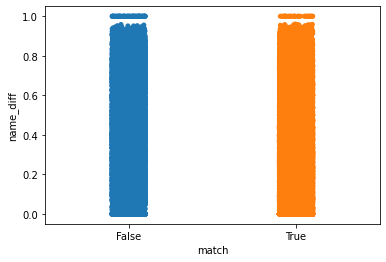

In [ ]:
sns.stripplot(x="match", y="name_diff", data=pairs)
plt.show()

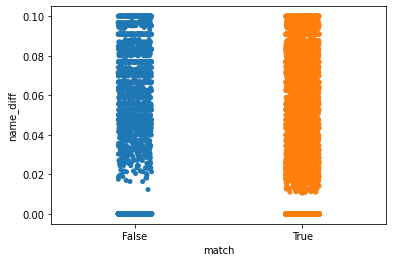

In [ ]:
sns.stripplot(x="match", y="name_diff", data=pairs.loc[pairs.name_diff<0.1])
plt.show()

In [ ]:
pairs.loc[(pairs.location_diff<0.01)&(pairs.name_diff==0)&(pairs.match==False)][['name_1','name_2']]

name_1                    name_2
702                 Panera Bread              Panera Bread
755                    Starbucks                 Starbucks
849                     Wingstop                  Wingstop
1071             Bank of America           Bank of America
1403                AT&T U-verse              AT&T U-verse
...                          ...                       ...
577660                   Dunkin'                   Dunkin'
577867              Jimmy John's              Jimmy John's
578340                 Starbucks                 Starbucks
578407  XFINITY Store by Comcast  XFINITY Store by Comcast
578607                      Cosi                      Cosi

[2692 rows x 2 columns]

### Address

In [ ]:
pairs['address_diff'] = pairs.apply(sim_metric,
                          args=('address_1', 'address_2'),
                          axis=1)

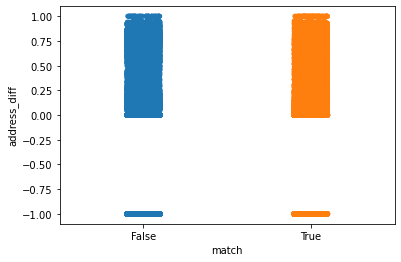

In [ ]:
sns.stripplot(x="match", y="address_diff", data=pairs)
plt.show()

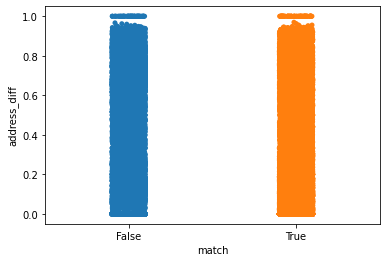

In [ ]:
sns.stripplot(x="match", y="address_diff", data=pairs.loc[pairs.address_diff>=0])
plt.show()

In [ ]:
pairs.loc[(pairs.location_diff<0.01)&(pairs.name_diff<0.1)&(pairs.address_diff==0)&(pairs.match==False)&(pairs.country_1=='US')][['name_1','name_2','address_1','address_2']]

name_1  \
532          Parkview High School Building H   
2526      Sprague Lake Rest Area (Westbound)   
5315                             Section 304   
5316                             Section 304   
6259                Facebook 1050 Building 2   
...                                      ...   
571522               Conference Room HS 2007   
572791   Mann Center for the Performing Arts   
575350   Pozez Education Center Centennial D   
576064  UCF Business Administration II (BA2)   
578153        Gym @ Spinnaker Bay Apartments   

                                            name_2  \
532                Parkview High School Building C   
2526            Sprague Lake Rest Area (Eastbound)   
5315                                   Section 305   
5316                                   Section 308   
6259                      Facebook 1050 Building 1   
...                                            ...   
571522                     Conference Room HS 2038   
572791  Mann Center for the Performing Arts D Gate   
575350         Pozez Education Center Centennial A   
576064         UCF Business Administration I (BA1)   
578153                    Spinnaker Bay Apartments   

                                                address_1  \
532                        998 Cole Dr, Lilburn, GA 30047   
2526                                        Interstate 90   
5315                                       KeyBank Center   
5316                                       KeyBank Center   
6259                                    1050 Page Mill Rd   
...                                                   ...   
571522  Health Information and Translational Science (HS)   
572791                                  5201 Parkside Ave   
575350                                    1505 SW 8th Ave   
576064                          4000 Central Florida Blvd   
578153                                   707 President St   

                                                address_2  
532                        998 Cole Dr, Lilburn, GA 30047  
2526                                        Interstate 90  
5315                                       KeyBank Center  
5316                                       KeyBank Center  
6259                                    1050 Page Mill Rd  
...                                                   ...  
571522  Health Information and Translational Science (HS)  
572791                                  5201 Parkside Ave  
575350                                    1505 SW 8th Ave  
576064                          4000 Central Florida Blvd  
578153                                   707 President St  

[375 rows x 4 columns]

In [ ]:
pairs.match.value_counts()

True     84611
False    33097
Name: match, dtype: int64

In [ ]:
pairs.loc[pairs.location_diff<1].match.value_counts()

True     83822
False    33006
Name: match, dtype: int64

### City

In [ ]:
pairs['city_diff'] = pairs.apply(sim_metric,
                          args=('city_1', 'city_2'),
                          axis=1)

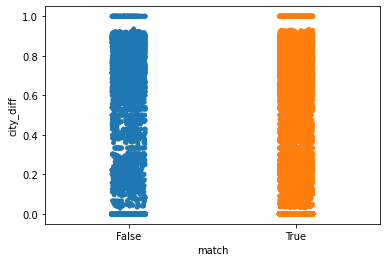

In [ ]:
sns.stripplot(x="match", y="city_diff", data=pairs.loc[pairs.city_diff>=0])
plt.show()

In [ ]:
pairs.loc[(pairs.location_diff<0.01)&(pairs.name_diff<0.1)&(pairs.address_diff==0)&(pairs.city_diff==0)&(pairs.match==False)&(pairs.country_1=='US')][['name_1','name_2','address_1','address_2']]

name_1  \
532          Parkview High School Building H   
2526      Sprague Lake Rest Area (Westbound)   
5315                             Section 304   
5316                             Section 304   
6259                Facebook 1050 Building 2   
...                                      ...   
571522               Conference Room HS 2007   
572791   Mann Center for the Performing Arts   
575350   Pozez Education Center Centennial D   
576064  UCF Business Administration II (BA2)   
578153        Gym @ Spinnaker Bay Apartments   

                                            name_2  \
532                Parkview High School Building C   
2526            Sprague Lake Rest Area (Eastbound)   
5315                                   Section 305   
5316                                   Section 308   
6259                      Facebook 1050 Building 1   
...                                            ...   
571522                     Conference Room HS 2038   
572791  Mann Center for the Performing Arts D Gate   
575350         Pozez Education Center Centennial A   
576064         UCF Business Administration I (BA1)   
578153                    Spinnaker Bay Apartments   

                                                address_1  \
532                        998 Cole Dr, Lilburn, GA 30047   
2526                                        Interstate 90   
5315                                       KeyBank Center   
5316                                       KeyBank Center   
6259                                    1050 Page Mill Rd   
...                                                   ...   
571522  Health Information and Translational Science (HS)   
572791                                  5201 Parkside Ave   
575350                                    1505 SW 8th Ave   
576064                          4000 Central Florida Blvd   
578153                                   707 President St   

                                                address_2  
532                        998 Cole Dr, Lilburn, GA 30047  
2526                                        Interstate 90  
5315                                       KeyBank Center  
5316                                       KeyBank Center  
6259                                    1050 Page Mill Rd  
...                                                   ...  
571522  Health Information and Translational Science (HS)  
572791                                  5201 Parkside Ave  
575350                                    1505 SW 8th Ave  
576064                          4000 Central Florida Blvd  
578153                                   707 President St  

[353 rows x 4 columns]

### State

### Zip


---

Zip codes are stored as strings in the orginal data.

In [ ]:
pairs['zip_diff'] = pairs.apply(sim_metric,
                          args=('zip_1', 'zip_2'),
                          axis=1)

# PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:
## Make a pipeline for your PCA
pipe = Pipeline([('scale', StandardScaler()),
                    ('pca', PCA(2))])

feature_col = ['location_diff','name_diff']
#['location_diff','name_diff','address_diff', 'city_diff',	'zip_diff']

pairs_sample = pairs.loc[pairs.location_diff<1]
X_train = pairs_sample[feature_col]

pipe.fit(X_train.values)

fit = pipe.transform(X_train.values)

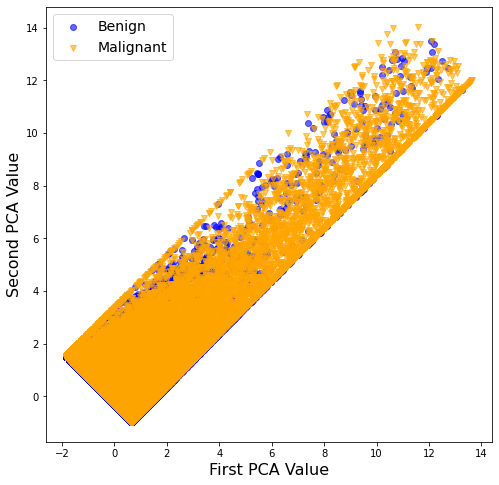

In [ ]:
y_train = pairs_sample['match']

plt.figure(figsize=(8,8))

plt.scatter(fit[y_train==0, 0],
               fit[y_train==0, 1],
               c = 'b',
               alpha = .6,
               label='Benign')

plt.scatter(fit[y_train==1, 0],
               fit[y_train==1, 1],
               c = 'orange',
               marker = 'v',
               alpha = .6,
               label='Malignant')

plt.legend(fontsize=14)

plt.xlabel("First PCA Value", fontsize=16)
plt.ylabel("Second PCA Value", fontsize=16)

plt.show()

# Submission

---


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Summer 2022/foursquare-location-matching/sample_submission.csv')

In [ ]:
submission

id                            matches
0  E_00001118ad0191                   E_00001118ad0191
1  E_000020eb6fed40                   E_000020eb6fed40
2  E_00002f98667edf                   E_00002f98667edf
3  E_001b6bad66eb98  E_001b6bad66eb98 E_0283d9f61e569d
4  E_0283d9f61e569d  E_0283d9f61e569d E_001b6bad66eb98

In [ ]:
set(test.id).intersection(set(train.id))

{'E_001b6bad66eb98', 'E_0283d9f61e569d'}

In [ ]:
df = train.loc[train.id==test.id[3]]
df.append(train.loc[train.id==test.id[4]])

id                    name   latitude   longitude  \
434    E_001b6bad66eb98  Foreword Communicatons   1.302216  103.861456   
11033  E_0283d9f61e569d           風雲児 (Fu-unji)  35.687101  139.696684   

         address city state       zip country                     url  \
434          NaN  NaN   NaN       NaN      SG                     NaN   
11033  代々木2-14-3  渋谷区   東京都  151-0053      JP  http://www.fu-unji.com   

            phone         categories point_of_interest  
434           NaN                NaN  P_540b73568b0d3c  
11033  0364138480  Ramen Restaurants  P_fe5531aa3acd9d

In [ ]:
test.columns

Index(['id', 'name', 'latitude', 'longitude', 'address', 'city', 'state',
       'zip', 'country', 'url', 'phone', 'categories'],
      dtype='object')

In [ ]:
test.country

0    MY
1    US
2    RU
3    ID
4    ID
Name: country, dtype: object